## Here we are specifically using EMNIST letter dataset. So Let's get started

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [3]:
#/kaggle/input/emnist/emnist-letters-mapping.txt
testing_letter = pd.read_csv('/kaggle/input/emnist/emnist-letters-test.csv')
training_letter = pd.read_csv('/kaggle/input/emnist/emnist-letters-train.csv')

In [4]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [5]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


## Let's see what type of images we have got. 

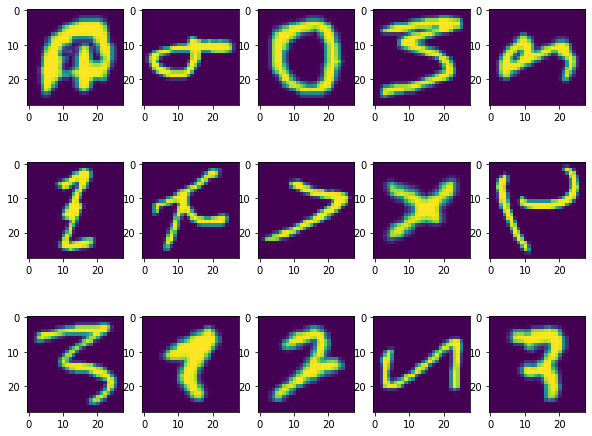

In [6]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))


In [7]:
import tensorflow as tf

In [8]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [9]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [10]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [13]:
# model = tf.keras.Sequential([ 
#     tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(input_shape=(28,28,1)),
#     tf.keras.layers.Dense(512,activation='relu'),
#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dense(number_of_classes,activation='softmax')
# ])

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.regularizers import l2

# Define the number of classes (adjust based on your EMNIST dataset subset)
number_of_classes = 37  # Update this based on your specific EMNIST subset (e.g., Balanced, Letters, Digits)

# Build the model
model = Sequential()

# First convolutional layer with BatchNormalization and LeakyReLU
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers with BatchNormalization, LeakyReLU, and Dropout
model.add(Dense(512, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))

model.add(Dense(128, kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(number_of_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 11, 11, 64)       

In [29]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## Adding Callback API's to save best weights and change lr

In [26]:
 
# MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
# ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
# RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [32]:
# history = model.fit(train_x,train_y,epochs=50,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])
history = model.fit(train_x,train_y,epochs=50,validation_data=(test_x,test_y))


Train on 71039 samples, validate on 17760 samples
Epoch 1/50
71039/71039 [==============================] - 22s 317us/step - loss: 3.1994 - accuracy: 0.7136 - val_loss: 1.2377 - val_accuracy: 0.8014
Epoch 2/50
71039/71039 [==============================] - 18s 257us/step - loss: 1.2992 - accuracy: 0.7849 - val_loss: 1.1627 - val_accuracy: 0.8173
Epoch 3/50
71039/71039 [==============================] - 18s 256us/step - loss: 1.2079 - accuracy: 0.7961 - val_loss: 1.1078 - val_accuracy: 0.8152
Epoch 4/50
71039/71039 [==============================] - 18s 256us/step - loss: 1.1366 - accuracy: 0.8044 - val_loss: 1.0210 - val_accuracy: 0.8302
Epoch 5/50
71039/71039 [==============================] - 18s 258us/step - loss: 1.0897 - accuracy: 0.8091 - val_loss: 0.9903 - val_accuracy: 0.8313
Epoch 6/50
71039/71039 [==============================] - 18s 259us/step - loss: 1.0753 - accuracy: 0.8102 - val_loss: 1.0201 - val_accuracy: 0.8246
Epoch 7/50
71039/71039 [==============================] 

KeyboardInterrupt: 

## Adding Callback API's to save best weights and change lr

In [37]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [38]:
history = model.fit(train_x,train_y,epochs=50,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Train on 71039 samples, validate on 17760 samples
Epoch 1/50
71039/71039 [==============================] - 19s 270us/step - loss: 0.9980 - accuracy: 0.8206 - val_loss: 0.9372 - val_accuracy: 0.8320

Epoch 00001: val_accuracy improved from -inf to 0.83198, saving model to Best_points.h5
Epoch 2/50
71039/71039 [==============================] - 19s 263us/step - loss: 0.9987 - accuracy: 0.8198 - val_loss: 0.8951 - val_accuracy: 0.8443

Epoch 00002: val_accuracy improved from 0.83198 to 0.84426, saving model to Best_points.h5
Epoch 3/50
71039/71039 [==============================] - 19s 266us/step - loss: 0.9880 - accuracy: 0.8201 - val_loss: 0.9413 - val_accuracy: 0.8320

Epoch 00003: val_accuracy did not improve from 0.84426
Epoch 4/50
71039/71039 [==============================] - 19s 264us/step - loss: 0.9889 - accuracy: 0.8199 - val_loss: 0.9400 - val_accuracy: 0.8291

Epoch 00004: val_accuracy did not improve from 0.84426
Epoch 5/50
71039/71039 [==============================] - 19s

In [39]:
import seaborn as sns

Text(0, 0.5, 'Accuray')

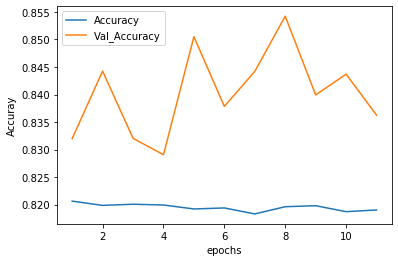

In [40]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [41]:
train_x2,test_x2,train_y2,test_y2 = train_test_split(train_images,y1,test_size=0.15,random_state = 42)

In [42]:
history1 = model.fit(train_x2,train_y2,epochs=10,validation_data=(test_x2,test_y2))

Train on 75479 samples, validate on 13320 samples
Epoch 1/10
75479/75479 [==============================] - 19s 256us/step - loss: 0.7385 - accuracy: 0.8648 - val_loss: 0.5596 - val_accuracy: 0.8942
Epoch 2/10
75479/75479 [==============================] - 20s 259us/step - loss: 0.6334 - accuracy: 0.8755 - val_loss: 0.5288 - val_accuracy: 0.8973
Epoch 3/10
75479/75479 [==============================] - 19s 256us/step - loss: 0.6015 - accuracy: 0.8741 - val_loss: 0.5119 - val_accuracy: 0.8980
Epoch 4/10
75479/75479 [==============================] - 19s 256us/step - loss: 0.5906 - accuracy: 0.8755 - val_loss: 0.5050 - val_accuracy: 0.8957
Epoch 5/10
75479/75479 [==============================] - 19s 258us/step - loss: 0.5844 - accuracy: 0.8772 - val_loss: 0.5001 - val_accuracy: 0.8979
Epoch 6/10
75479/75479 [==============================] - 19s 257us/step - loss: 0.5805 - accuracy: 0.8776 - val_loss: 0.4965 - val_accuracy: 0.8982
Epoch 7/10
75479/75479 [==============================] 

Text(0, 0.5, 'Accuray')

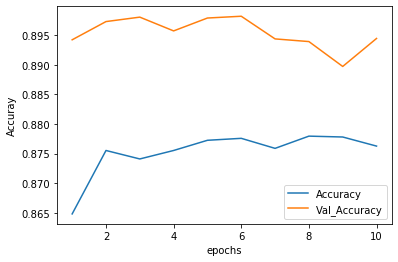

In [43]:
q = len(history1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')